In [1]:
pwd


'C:\\Users\\shacharW'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import os
os.chdir("C:\\Users\\shacharW\\Desktop\\GiladIsana2-master\\NoteBook")


In [4]:
from Data_Exploration_Utils import *

In [5]:
def model_run(score_measure):
    best_est = []
    run = training_config.keys()
    results = {'name': [], 'f1': [], 'accuracy': []}
    # train_pred = {}
    # test_pred = {}
    for name in exp_to_run:
        conf = training_config[name]
        clf = conf['clf']
        parameters = conf['parameters']
        n_jobs = conf.get('n_jobs', 1)

        print('------results by highest'+score_measure+'------')
        print('=' * 20)
        print('Starting training:', name)
        grid_obj = GridSearchCV(clf, parameters, scoring=score_measure, cv=4, n_jobs=n_jobs, verbose=3)
        train_X = train_x

        print('Number of Features:', train_X.columns.shape[0])
        grid_obj = grid_obj.fit(train_X, train_y)
        best_clf = grid_obj.best_estimator_
        best_est.append(best_clf)

        print('Best classifier:', repr(best_clf))
        model = best_clf.fit(train_X, train_y)
        pred_y = best_clf.predict(test_x)

 
        f1 = f1_score(test_y, pred_y)
        acc = accuracy_score(test_y, pred_y)
        params = grid_obj.best_params_ ()
        results['name'].append(name)
        results['f1'].append(f1)
        results['accuracy'].append(acc)
        results['best parameters'].append(params)


        try:
            feature_importances = pd.DataFrame(best_clf.feature_importances_, index=train_X.columns,
                                               columns=['importance'])
            a = feature_importances.sort_values('importance', ascending=False)
            print (a.head(10))
        except Exception:
            print ("This model has no attribute 'feature_importances_")

        print (results)
    return best_est


In [6]:
training_config = {
#     'gbdt': {
#         'clf': GradientBoostingClassifier(),
#         'parameters': {
#             'n_estimators': [10,50,100,200],
#             'learning_rate': [0.05, 0.1],
#             'max_depth': [2,3,4],
#             'min_samples_leaf': [2,3],
#         },
#         'n_jobs': 4,
#         'one_hot': False
#     },
#     'logit' : {
#         'clf': LogisticRegression(),
#         'parameters': {
#             'penalty': ['l1', 'l2'],
#             'C': list(np.arange(0.5, 8.0, 0.1))
#         }
#     },
    'rbf Kernel': {
        'clf': SVC(),
        'parameters': {'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
    },
     'Linear Kernel': {
        'clf': SVC(),
        'parameters': {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
    },
    'rf': {
        'clf': RandomForestClassifier(),
        'parameters': {
            'n_estimators':[10,50,100,200,500],
            'criterion': ['gini', 'entropy'],
            'max_depth':[2,3,4,10,20],
            'min_samples_leaf': [2,3],
        },
        'n_jobs': 3,
        'one_hot': False
    }
#     'ada': {
#         'clf': AdaBoostClassifier(),
#         'parameters': {
#             'n_estimators': [10,50,100,200],
#             'learning_rate': [0.05, 0.1, 0.5, 1.0, 2.0],
#         },
#         'n_jobs': 4,
#         'one_hot': False
#     }
}

exp_to_run = training_config.keys()

# Vienna

In [7]:
f_pos, f_neg = get_latest_sample_file("vienna")
v_pos = pd.read_csv(f_pos)
v_neg = pd.read_csv(f_neg)

vienna_pos20181216-142819.csv
vienna_neg20181216-142819.csv


In [8]:
#v_pos = pd.read_csv('vienna_pos20181210-233321.csv')
#v_neg = pd.read_csv('vienna_neg20181210-233321.csv')


In [9]:
v_pos.head()

,line_index,seq_ID,microRNA_name,miRNA_seq,mRNA_name,site_start,mRNA_seq_extended,full_mrna_seq,constraint,duplex_RNAplex_equals,...,Acc_P9_10th,Acc_P9_1th,Acc_P9_2th,Acc_P9_3th,Acc_P9_4th,Acc_P9_5th,Acc_P9_6th,Acc_P9_7th,Acc_P9_8th,Acc_P9_9th
0,0,0727A-1038930_1,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000113328_ENST00000340828_CCNG1_mRNA,699,ATTTGTATCTACGATAAAAATTTTTATACAGAACCTACTGCCTCAA...,CTGGATTATTACAGCACCAAAAAACTTCTCTGAAGCCTTTCTCCAC...,0,1,...,0.088237,0.770062,0.169658,0.140938,0.121171,0.120142,0.097685,0.094227,0.091975,0.090001
1,1,L1HS-745335_2,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000217128_ENST00000307968_FNIP1_mRNA,1195,AATACTTTCTACTACCTCAGTTTACTTGAGTACTACATTATAGTTTAT,TATACCTAAAAATTGTTAGAAATTGGTGGGAAAATAGGTAGAAACC...,0,1,...,0.067301,0.187898,0.165865,0.153657,0.137790,0.124815,0.113508,0.099005,0.088623,0.078054
2,2,L2HS-1055266_2,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000254004_ENST00000523638_ZNF260_mRNA,2402,CTCACTGCAACCTCTGCCTCACAGGTTCAAGTGGTTCTCCTGCCTC...,AGTTCTCTATGAATGCCTTGGATTTAGCAAAACGTTCAGCAGATTT...,0,1,...,0.000626,0.468322,0.295912,0.016281,0.008842,0.005830,0.003421,0.002774,0.000988,0.000732
3,3,L1HS-242486_4,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000083844_ENST00000263095_ZNF264_mRNA,4507,GGCTCTCTGCAACCTCTGCCTCCCGGGTTCAAGCAATTAACTGCCTC,GAAAACCTTCTGTTGCTGAATATTACTTGTCATCTGAAGAGTCATA...,0,0,...,0.000541,0.156362,0.054231,0.032081,0.025560,0.023711,0.021812,0.020374,0.004978,0.000796
4,4,L2HS-818525_2,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000206562_ENST00000443029_METTL6_mRNA,1586,ACTCATTGCAACCTCTGCCTCCCAGGCCCAAGCAATCCTCCTACCTCA,CCTTTCATGAGGTCTCAAACAAAAGTCTGGAACCTGGGATTCTTTG...,0,1,...,0.031601,0.076992,0.055394,0.047508,0.044398,0.041145,0.040984,0.041054,0.039158,0.033451


In [10]:
v_pos['duplex_RNAplex_equals'].describe()


count    3353.000000
mean        0.944229
std         0.229513
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: duplex_RNAplex_equals, dtype: float64

In [11]:
sum(v_pos['duplex_RNAplex_equals'])

3166

In [12]:
#correlation matrix
corrmat = v_pos.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


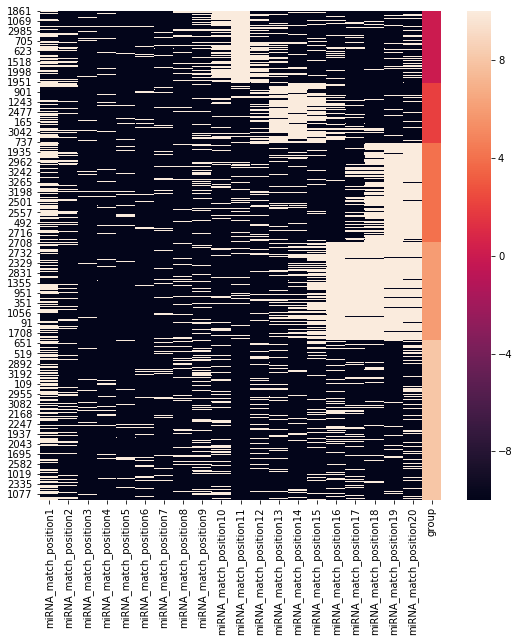

In [13]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(clustering(v_pos))
plt.show()

In [17]:
train_x, test_x, train_y, test_y =  train_test_prepare (v_pos, v_neg)


In [18]:
best_lst_vienna_auc = model_run('roc_auc')
best_lst_vienna_accuracy = model_run('accuracy')

------results by highestroc_auc------
Starting training: rbf Kernel
Number of Features: 573
Fitting 4 folds for each of 32 candidates, totalling 128 fits
[CV] C=0.001, gamma=0.01, kernel=rbf .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.7713735295687921, total=  22.1s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.7s remaining:    0.0s


[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.7882178640707587, total=  17.5s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.7715648413446994, total=  17.5s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................


[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.75450250040042, total=  17.5s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.6516701962947804, total=  17.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.6826248865476677, total=  17.6s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.6643568365040665, total=  17.6s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.653834688829172, total=  17.9s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................


[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.6278452065277358, total=  17.6s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................


[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.6583038208965848, total=  17.7s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................


[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.6449275684718194, total=  17.5s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................


[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.6343920734637218, total=  17.6s
[CV] C=0.001, gamma=1e-05, kernel=rbf ................................


[CV]  C=0.001, gamma=1e-05, kernel=rbf, score=0.6260032745457458, total=  17.6s
[CV] C=0.001, gamma=1e-05, kernel=rbf ................................


[CV]  C=0.001, gamma=1e-05, kernel=rbf, score=0.656119307362389, total=  17.5s
[CV] C=0.001, gamma=1e-05, kernel=rbf ................................


[CV]  C=0.001, gamma=1e-05, kernel=rbf, score=0.6430255734904167, total=  17.6s
[CV] C=0.001, gamma=1e-05, kernel=rbf ................................


[CV]  C=0.001, gamma=1e-05, kernel=rbf, score=0.6327347795910377, total=  17.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8282620882347707, total=  15.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8329581249666316, total=  16.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8314854692032533, total=  15.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8158957840223522, total=  15.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.8310605790962966, total=  14.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.8347711377266822, total=  14.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.8341104447331423, total=  14.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.8256905020376928, total=  14.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7182377960883416, total=  16.8s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7378717232296987, total=  16.6s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7281726611023117, total=  16.6s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7219728248295991, total=  16.6s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................


[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6261923617661191, total=  18.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................


[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6566732216903062, total=  17.2s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................


[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6438464344823904, total=  17.2s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................


[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6331552205869267, total=  17.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8282620882347707, total=  14.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8329581249666316, total=  15.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8314854692032533, total=  14.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8158957840223522, total=  14.9s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.8310605790962966, total=  13.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.8347711377266822, total=  13.8s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.8341104447331423, total=  13.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.8256905020376928, total=  13.7s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7182377960883416, total=  16.2s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7378717232296987, total=  16.3s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7281726611023117, total=  16.4s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7219728248295991, total=  16.5s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................


[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6261923617661191, total=  17.1s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................


[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6566732216903062, total=  17.2s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................


[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6438464344823904, total=  17.2s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................


[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6331552205869267, total=  18.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.915486910715239, total=  15.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.8998594080902635, total=  15.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9146504778345286, total=  16.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9026423270630528, total=  15.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9260135075012013, total=10.3min
[CV] C=10, gamma=0.001, kernel=rbf ...................................


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.919148529123881, total=  12.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9232928760833586, total=  10.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9124637397447989, total=  10.5s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.898297770105533, total=  11.6s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.8884185189799079, total=  11.6s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.901118506522397, total=  11.2s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.8882361054261358, total=  10.7s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................


[CV]  C=10, gamma=1e-05, kernel=rbf, score=0.8469995194960047, total=  13.6s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................


[CV]  C=10, gamma=1e-05, kernel=rbf, score=0.8430754035343738, total=  15.8s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................


[CV]  C=10, gamma=1e-05, kernel=rbf, score=0.8462298232813084, total=  14.1s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................


[CV]  C=10, gamma=1e-05, kernel=rbf, score=0.8405193892260326, total=  17.6s
[CV] C=25, gamma=0.01, kernel=rbf ....................................


[CV]  C=25, gamma=0.01, kernel=rbf, score=0.915486910715239, total=  22.2s
[CV] C=25, gamma=0.01, kernel=rbf ....................................


[CV]  C=25, gamma=0.01, kernel=rbf, score=0.8998594080902635, total=  16.9s
[CV] C=25, gamma=0.01, kernel=rbf ....................................


[CV]  C=25, gamma=0.01, kernel=rbf, score=0.9146504778345286, total=  17.7s
[CV] C=25, gamma=0.01, kernel=rbf ....................................


[CV]  C=25, gamma=0.01, kernel=rbf, score=0.9026423270630528, total=  16.6s
[CV] C=25, gamma=0.001, kernel=rbf ...................................


[CV]  C=25, gamma=0.001, kernel=rbf, score=0.9297240661315871, total=  10.0s
[CV] C=25, gamma=0.001, kernel=rbf ...................................


[CV]  C=25, gamma=0.001, kernel=rbf, score=0.921911427096866, total=   9.7s
[CV] C=25, gamma=0.001, kernel=rbf ...................................


[CV]  C=25, gamma=0.001, kernel=rbf, score=0.9255752700610418, total=   9.5s
[CV] C=25, gamma=0.001, kernel=rbf ...................................


[CV]  C=25, gamma=0.001, kernel=rbf, score=0.9160875407093663, total=   9.6s
[CV] C=25, gamma=0.0001, kernel=rbf ..................................


[CV]  C=25, gamma=0.0001, kernel=rbf, score=0.9106974426509583, total=  13.4s
[CV] C=25, gamma=0.0001, kernel=rbf ..................................


[CV]  C=25, gamma=0.0001, kernel=rbf, score=0.9012341834101547, total=   9.6s
[CV] C=25, gamma=0.0001, kernel=rbf ..................................


[CV]  C=25, gamma=0.0001, kernel=rbf, score=0.911440444199249, total=  10.6s
[CV] C=25, gamma=0.0001, kernel=rbf ..................................


[CV]  C=25, gamma=0.0001, kernel=rbf, score=0.8995969105372748, total=  10.3s
[CV] C=25, gamma=1e-05, kernel=rbf ...................................


[CV]  C=25, gamma=1e-05, kernel=rbf, score=0.8677257034044599, total=  13.0s
[CV] C=25, gamma=1e-05, kernel=rbf ...................................


[CV]  C=25, gamma=1e-05, kernel=rbf, score=0.8589654037123382, total=  12.1s
[CV] C=25, gamma=1e-05, kernel=rbf ...................................


[CV]  C=25, gamma=1e-05, kernel=rbf, score=0.8696877613852751, total=  12.3s
[CV] C=25, gamma=1e-05, kernel=rbf ...................................


[CV]  C=25, gamma=1e-05, kernel=rbf, score=0.8614057411329217, total=  18.3s
[CV] C=50, gamma=0.01, kernel=rbf ....................................


[CV]  C=50, gamma=0.01, kernel=rbf, score=0.915486910715239, total=  18.9s
[CV] C=50, gamma=0.01, kernel=rbf ....................................


[CV]  C=50, gamma=0.01, kernel=rbf, score=0.8998594080902635, total=  18.0s
[CV] C=50, gamma=0.01, kernel=rbf ....................................


[CV]  C=50, gamma=0.01, kernel=rbf, score=0.9146504778345286, total=  16.5s
[CV] C=50, gamma=0.01, kernel=rbf ....................................


[CV]  C=50, gamma=0.01, kernel=rbf, score=0.9026423270630528, total=  22.9s
[CV] C=50, gamma=0.001, kernel=rbf ...................................


[CV]  C=50, gamma=0.001, kernel=rbf, score=0.9292813795803598, total=  13.4s
[CV] C=50, gamma=0.001, kernel=rbf ...................................


[CV]  C=50, gamma=0.001, kernel=rbf, score=0.9221049634283071, total=  11.7s
[CV] C=50, gamma=0.001, kernel=rbf ...................................


[CV]  C=50, gamma=0.001, kernel=rbf, score=0.9249991101777865, total=  10.9s
[CV] C=50, gamma=0.001, kernel=rbf ...................................


[CV]  C=50, gamma=0.001, kernel=rbf, score=0.9158984534889929, total=  12.9s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................


[CV]  C=50, gamma=0.0001, kernel=rbf, score=0.9139853357299211, total=  15.3s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................


[CV]  C=50, gamma=0.0001, kernel=rbf, score=0.9074629389048069, total=  11.8s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................


[CV]  C=50, gamma=0.0001, kernel=rbf, score=0.914523678169102, total=  11.8s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................


[CV]  C=50, gamma=0.0001, kernel=rbf, score=0.9037568293854887, total=  12.8s
[CV] C=50, gamma=1e-05, kernel=rbf ...................................


[CV]  C=50, gamma=1e-05, kernel=rbf, score=0.8830973821430478, total=  13.7s
[CV] C=50, gamma=1e-05, kernel=rbf ...................................


[CV]  C=50, gamma=1e-05, kernel=rbf, score=0.8724706803580644, total=  11.9s
[CV] C=50, gamma=1e-05, kernel=rbf ...................................


[CV]  C=50, gamma=1e-05, kernel=rbf, score=0.8853820006762649, total=  11.6s
[CV] C=50, gamma=1e-05, kernel=rbf ...................................


[CV]  C=50, gamma=1e-05, kernel=rbf, score=0.875373725329679, total=  11.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[CV]  C=100, gamma=0.01, kernel=rbf, score=0.915486910715239, total=  17.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[CV]  C=100, gamma=0.01, kernel=rbf, score=0.8998594080902635, total=  16.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9146504778345286, total=  16.5s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9026423270630528, total=  19.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9258466658361659, total=  10.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9215132316563152, total=  10.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9215599473225249, total=  10.7s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9152755779395277, total=  11.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9177871011371928, total=  12.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9120410741933761, total=   9.7s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.917215390365005, total=   8.9s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9063061700272285, total=   8.7s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................


[CV]  C=100, gamma=1e-05, kernel=rbf, score=0.8975770141125803, total=  10.9s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................


[CV]  C=100, gamma=1e-05, kernel=rbf, score=0.8854398391201438, total=  10.6s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................


[CV]  C=100, gamma=1e-05, kernel=rbf, score=0.8987760495453009, total=  10.6s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................


[CV]  C=100, gamma=1e-05, kernel=rbf, score=0.8868835756615828, total=  10.9s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.915486910715239, total=  16.9s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.8998594080902635, total=  16.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.9146504778345286, total=  16.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.9026423270630528, total=  16.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9204788133330962, total=  12.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9189527682369063, total=  10.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9186635760175117, total=  10.5s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9121033617483227, total=  10.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.9218446904308519, total=  10.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.9162076667081918, total=  10.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.920318645334662, total=  11.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.9117785766403872, total=  10.9s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................


[CV]  C=1000, gamma=1e-05, kernel=rbf, score=0.9113536865334306, total=   8.8s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................


[CV]  C=1000, gamma=1e-05, kernel=rbf, score=0.9064262960260541, total=   8.8s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................


[CV]  C=1000, gamma=1e-05, kernel=rbf, score=0.9127284618533218, total=   8.9s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................


[CV]  C=1000, gamma=1e-05, kernel=rbf, score=0.9030983609474826, total=   8.9s


[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed: 60.2min finished


Best classifier: SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


AttributeError: 'SVC' object has no attribute 'best_params_'

In [15]:
best_lst_vienna_auc
best_lst_vienna_accuracy

[LinearSVC(C=3.5, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=20, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)]

# Vienna with constraints

In [16]:
f_pos, f_neg = get_latest_sample_file("vienna_constraint")
vc_pos = pd.read_csv(f_pos)
vc_neg = pd.read_csv(f_neg)

vienna_constraint_pos20181216-162234.csv
vienna_constraint_neg20181216-162234.csv


In [17]:
vc_pos.head()

,Unnamed: 0,seq_ID,microRNA_name,miRNA_seq,mRNA_name,site_start,mRNA_seq_extended,full_mrna_seq,constraint,duplex_RNAplex_equals,...,Acc_P9_10th,Acc_P9_1th,Acc_P9_2th,Acc_P9_3th,Acc_P9_4th,Acc_P9_5th,Acc_P9_6th,Acc_P9_7th,Acc_P9_8th,Acc_P9_9th
0,0,0727A-1038930_1,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000113328_ENST00000340828_CCNG1_mRNA,699,ATTTGTATCTACGATAAAAATTTTTATACAGAACCTACTGCCTCAA...,CTGGATTATTACAGCACCAAAAAACTTCTCTGAAGCCTTTCTCCAC...,1,1,...,0.088237,0.770062,0.169658,0.140938,0.121171,0.120142,0.097685,0.094227,0.091975,0.090001
1,1,L1HS-745335_2,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000217128_ENST00000307968_FNIP1_mRNA,1195,AATACTTTCTACTACCTCAGTTTACTTGAGTACTACATTATAGTTTAT,TATACCTAAAAATTGTTAGAAATTGGTGGGAAAATAGGTAGAAACC...,1,1,...,0.067301,0.187898,0.165865,0.153657,0.137790,0.124815,0.113508,0.099005,0.088623,0.078054
2,2,L2HS-1055266_2,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000254004_ENST00000523638_ZNF260_mRNA,2402,CTCACTGCAACCTCTGCCTCACAGGTTCAAGTGGTTCTCCTGCCTC...,AGTTCTCTATGAATGCCTTGGATTTAGCAAAACGTTCAGCAGATTT...,1,1,...,0.000626,0.468322,0.295912,0.016281,0.008842,0.005830,0.003421,0.002774,0.000988,0.000732
3,3,L1HS-242486_4,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000083844_ENST00000263095_ZNF264_mRNA,4507,GGCTCTCTGCAACCTCTGCCTCCCGGGTTCAAGCAATTAACTGCCTC,GAAAACCTTCTGTTGCTGAATATTACTTGTCATCTGAAGAGTCATA...,1,0,...,0.000541,0.156362,0.054231,0.032081,0.025560,0.023711,0.021812,0.020374,0.004978,0.000796
4,4,L2HS-818525_2,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000206562_ENST00000443029_METTL6_mRNA,1586,ACTCATTGCAACCTCTGCCTCCCAGGCCCAAGCAATCCTCCTACCTCA,CCTTTCATGAGGTCTCAAACAAAAGTCTGGAACCTGGGATTCTTTG...,1,1,...,0.031601,0.076992,0.055394,0.047508,0.044398,0.041145,0.040984,0.041054,0.039158,0.033451


In [18]:
vc_pos['duplex_RNAplex_equals'].describe()


count    3353.000000
mean        0.937370
std         0.242333
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: duplex_RNAplex_equals, dtype: float64

In [19]:
sum(vc_pos['duplex_RNAplex_equals'])

3143

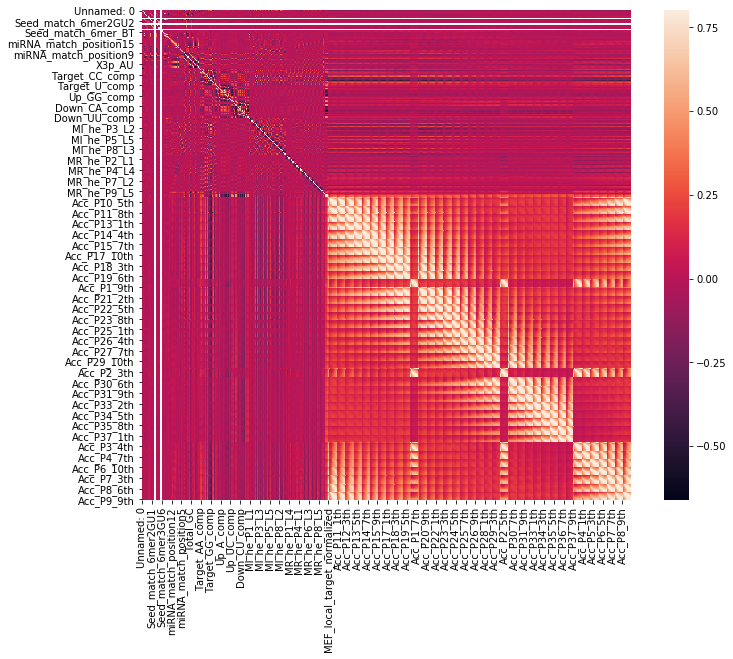

In [20]:
#correlation matrix
corrmat = vc_pos.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


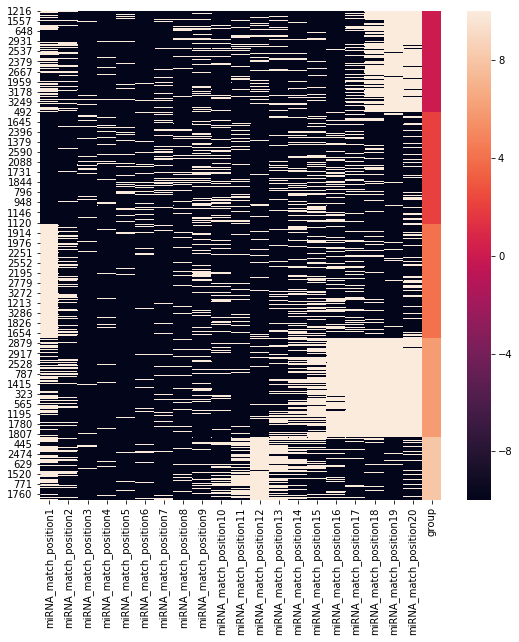

In [21]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(clustering(vc_pos))
plt.show()

# Miranda

In [22]:
f_pos, f_neg = get_latest_sample_file("miranda")
m_pos = pd.read_csv(f_pos)
m_neg = pd.read_csv(f_neg)

miranda_pos20181216-181424.csv
miranda_neg20181216-181424.csv


In [23]:
m_pos.head()

,Unnamed: 0,seq_ID,microRNA_name,miRNA_seq,mRNA_name,site_start,mRNA_seq_extended,full_mrna_seq,Seed_match_6mer1,Seed_match_6mer1GU1,...,Acc_P9_10th,Acc_P9_1th,Acc_P9_2th,Acc_P9_3th,Acc_P9_4th,Acc_P9_5th,Acc_P9_6th,Acc_P9_7th,Acc_P9_8th,Acc_P9_9th
0,0,0727A-1038930_1,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000113328_ENST00000340828_CCNG1_mRNA,699,ATTTGTATCTACGATAAAAATTTTTATACAGAACCTACTGCCTCAA...,CTGGATTATTACAGCACCAAAAAACTTCTCTGAAGCCTTTCTCCAC...,0,1,...,0.088237,0.770062,0.169658,0.140938,0.121171,0.120142,0.097685,0.094227,0.091975,0.090001
1,1,L1HS-745335_2,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000217128_ENST00000307968_FNIP1_mRNA,1198,AATACTTTCTACTACCTCAGTTTACTTGAGTACTACATTATAGTTTAT,TATACCTAAAAATTGTTAGAAATTGGTGGGAAAATAGGTAGAAACC...,1,0,...,0.067301,0.187898,0.165865,0.153657,0.137790,0.124815,0.113508,0.099005,0.088623,0.078054
2,2,L2HS-1055266_2,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000254004_ENST00000523638_ZNF260_mRNA,2402,CTCACTGCAACCTCTGCCTCACAGGTTCAAGTGGTTCTCCTGCCTC...,AGTTCTCTATGAATGCCTTGGATTTAGCAAAACGTTCAGCAGATTT...,0,1,...,0.000626,0.468322,0.295912,0.016281,0.008842,0.005830,0.003421,0.002774,0.000988,0.000732
3,3,L1HS-242486_4,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000083844_ENST00000263095_ZNF264_mRNA,4507,GGCTCTCTGCAACCTCTGCCTCCCGGGTTCAAGCAATTAACTGCCTC,GAAAACCTTCTGTTGCTGAATATTACTTGTCATCTGAAGAGTCATA...,0,0,...,0.000541,0.156362,0.054231,0.032081,0.025560,0.023711,0.021812,0.020374,0.004978,0.000796
4,4,L2HS-818525_2,MIMAT0000062_MirBase_let-7a_microRNA,TGAGGTAGTAGGTTGTATAGTT,ENSG00000206562_ENST00000443029_METTL6_mRNA,1610,ACTCATTGCAACCTCTGCCTCCCAGGCCCAAGCAATCCTCCTACCTCA,CCTTTCATGAGGTCTCAAACAAAAGTCTGGAACCTGGGATTCTTTG...,1,0,...,0.041217,0.724183,0.686880,0.604599,0.540813,0.532814,0.521918,0.515751,0.432788,0.082840


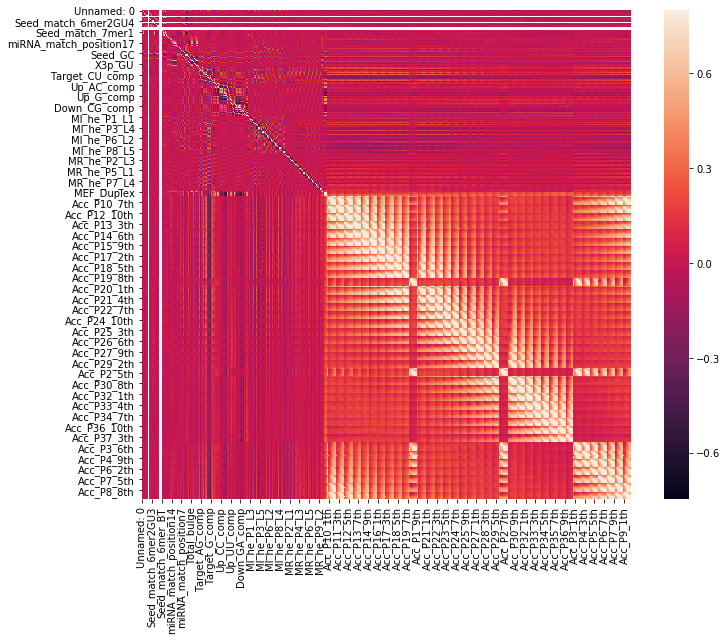

In [24]:
#correlation matrix
corrmat = m_pos.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


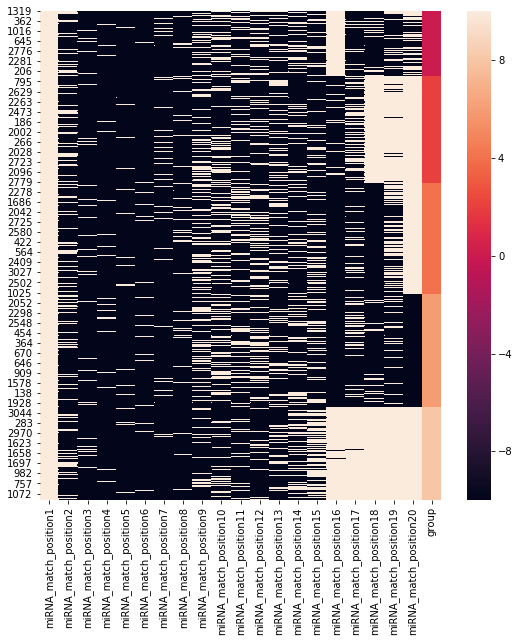

In [25]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(clustering(m_pos))
plt.show()

In [26]:
train_x, test_x, train_y, test_y =  train_test_prepare (m_pos, m_neg)


In [27]:
best_lst_miranda = model_run()

Starting training: svm
Number of Features: 596
Fitting 4 folds for each of 32 candidates, totalling 128 fits
[CV] C=0.5, loss=hinge, penalty=l2 ...................................
[CV]  C=0.5, loss=hinge, penalty=l2, score=0.8544410019429712, total=   3.8s
[CV] C=0.5, loss=hinge, penalty=l2 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  C=0.5, loss=hinge, penalty=l2, score=0.8605114740324528, total=   3.9s
[CV] C=0.5, loss=hinge, penalty=l2 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


[CV]  C=0.5, loss=hinge, penalty=l2, score=0.6197909993173345, total=   3.8s
[CV] C=0.5, loss=hinge, penalty=l2 ...................................
[CV]  C=0.5, loss=hinge, penalty=l2, score=0.6066523131859476, total=   3.8s
[CV] C=0.5, loss=squared_hinge, penalty=l2 ...........................
[CV]  C=0.5, loss=squared_hinge, penalty=l2, score=0.8183710549808328, total=   3.8s
[CV] C=0.5, loss=squared_hinge, penalty=l2 ...........................
[CV]  C=0.5, loss=squared_hinge, penalty=l2, score=0.8668613138686132, total=   3.8s
[CV] C=0.5, loss=squared_hinge, penalty=l2 ...........................
[CV]  C=0.5, loss=squared_hinge, penalty=l2, score=0.8392249120411699, total=   3.8s
[CV] C=0.5, loss=squared_hinge, penalty=l2 ...........................
[CV]  C=0.5, loss=squared_hinge, penalty=l2, score=0.7966601900960983, total=   3.9s
[CV] C=1.0, loss=hinge, penalty=l2 ...................................
[CV]  C=1.0, loss=hinge, penalty=l2, score=0.8558756498450873, total=   3.8s
[CV

[CV]  C=4.0, loss=hinge, penalty=l2, score=0.8617906842409284, total=   4.0s
[CV] C=4.0, loss=hinge, penalty=l2 ...................................
[CV]  C=4.0, loss=hinge, penalty=l2, score=0.8410019429711705, total=   4.0s
[CV] C=4.0, loss=hinge, penalty=l2 ...................................
[CV]  C=4.0, loss=hinge, penalty=l2, score=0.8690122354671007, total=   4.0s
[CV] C=4.0, loss=hinge, penalty=l2 ...................................
[CV]  C=4.0, loss=hinge, penalty=l2, score=0.7883967862206585, total=   4.0s
[CV] C=4.0, loss=squared_hinge, penalty=l2 ...........................
[CV]  C=4.0, loss=squared_hinge, penalty=l2, score=0.8455936564616919, total=   3.9s
[CV] C=4.0, loss=squared_hinge, penalty=l2 ...........................
[CV]  C=4.0, loss=squared_hinge, penalty=l2, score=0.7027905267027255, total=   4.4s
[CV] C=4.0, loss=squared_hinge, penalty=l2 ...........................
[CV]  C=4.0, loss=squared_hinge, penalty=l2, score=0.8146741584834322, total=   4.4s
[CV] C=4.0,

[CV]  C=7.0, loss=squared_hinge, penalty=l2, score=0.6786997846977892, total=   3.9s
[CV] C=7.0, loss=squared_hinge, penalty=l2 ...........................
[CV]  C=7.0, loss=squared_hinge, penalty=l2, score=0.7706831906737384, total=   4.0s
[CV] C=7.5, loss=hinge, penalty=l2 ...................................
[CV]  C=7.5, loss=hinge, penalty=l2, score=0.8587785537992964, total=   4.0s
[CV] C=7.5, loss=hinge, penalty=l2 ...................................
[CV]  C=7.5, loss=hinge, penalty=l2, score=0.7907808643596071, total=   4.0s
[CV] C=7.5, loss=hinge, penalty=l2 ...................................
[CV]  C=7.5, loss=hinge, penalty=l2, score=0.867936774667857, total=   3.9s
[CV] C=7.5, loss=hinge, penalty=l2 ...................................
[CV]  C=7.5, loss=hinge, penalty=l2, score=0.847311873129234, total=   4.0s
[CV] C=7.5, loss=squared_hinge, penalty=l2 ...........................
[CV]  C=7.5, loss=squared_hinge, penalty=l2, score=0.8364585411962401, total=   4.0s
[CV] C=7.5, l

[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:  8.6min finished


Best classifier: LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)
This model has no attribute 'feature_importances_
{'name': ['svm'], 'f1': [0.5894736842105263], 'accuracy': [0.6824104234527687]}
Starting training: rf
Number of Features: 596
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   10.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:  9.9min finished


Best classifier: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             importance
MEF_Duplex     0.043271
MI_he_P1_L2    0.019285
MI_he_P1_L3    0.015710
MI_he_P5_L3    0.012012
Unnamed: 0     0.010980
X3p_bulge      0.010690
Total_GC       0.009956
MI_he_P4_L3    0.009440
Total_bulge    0.009304
MI_he_P4_L2    0.008400
{'name': ['svm', 'rf'], 'f1': [0.5894736842105263, 0.8531249999999999], 'accuracy': [0.6824104234527687, 0.8469055374592834]}


In [28]:
best_lst_miranda

[LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=20, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)]

In [29]:
parameters = {'n_estimators': [10,50,100,200],
              'learning_rate': [0.05, 0.1],
              'max_depth': [2,3,4],
              'min_samples_leaf': [2,3],
              'verbose': [0]}

grid_obj = GridSearchCV(GradientBoostingClassifier(), parameters, scoring = 'roc_auc', cv = 4, n_jobs = 4, verbose = 1)
grid_obj = grid_obj.fit(X_train, y_train)
gb = grid_obj.best_estimator_              
gb

NameError: name 'X_train' is not defined

In [ ]:
m_model = gb.fit(X_train, y_train)
pred_y = m_model.predict(X_test)
m_f1 = f1_score(y_test, pred_y)
m_acc = accuracy_score(y_test, pred_y)
m_conf_m = confusion_matrix(y_test, predicted)

In [ ]:
print (acc)
print (conf_m)


In [ ]:
m_feature_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']) 
m_feature_importances.sort_values('importance', ascending=False)

In [ ]:
clf = RandomorestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X, Y)

In [ ]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, columns=['importance']) 
feature_importances.sort_values('importance', ascending=False)

In [ ]:
y_test


In [ ]:
from sklearn.metrics import confusion_matrix
predicted = clf.predict(X_test)

print(confusion_matrix(y_test, predicted))  